In [1]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [2]:
class Covid_Dataset(Dataset):
    def __init__(self, data, targets):
        super(Covid_Dataset, self)
        self.data = data
        self.targets = targets
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    def __len__(self):
        return len(self.targets)

**Importing Data**

In [3]:
#load the original data and the new prepared data
df = pd.read_excel("../CSV/Data-FakeRealCOVID.xlsx")
newDF = pd.read_csv("../CSV/newDF.csv")

In [4]:
#drop a column that contains indexs (it is created automatically when saving a dataFrame to a csv file)
newDF = newDF.drop('Unnamed: 0',axis=1)

<AxesSubplot:>

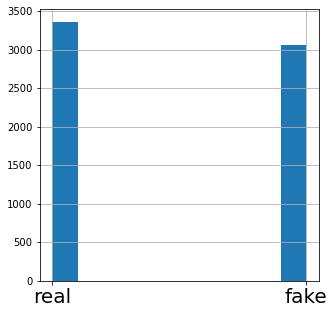

In [5]:
#pourcentage of fake and real news 
df.label.hist(xlabelsize=20,figsize=[5,5])

In [6]:
newDF

,aa,aadajoli,aai,aaj,aajtak,aamaadmiparti,aamctoday,aamir,aaradhya,ab,...,zombi,zone,zoo,zoodirector,zookeep,zoolog,zoom,zubymus,zydu,zyphr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419268,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#we already defined this function on Vecotrization file
def redDim(dfVec,seuil1,seuil2):
    subDf = dfVec[dfVec != 0]
    map = subDf.count(axis = 0) <= seuil1 
    map2 = subDf.count(axis = 0) >= (dfVec.shape[0] - seuil2) 
    resultDf = dfVec.drop(dfVec.columns[map+map2],axis=1)
    columns_dropped=dfVec.columns[map+map2]
    
    return resultDf,columns_dropped

In [8]:
#creating a tensor containing targets(fake,real)
labels = []
for label in df.label.to_numpy():
  if label == 'real':
    labels.append(1)
  else:
    labels.append(0)
targets=torch.tensor(labels)
targets

tensor([1, 1, 0,  ..., 0, 0, 1])

In [9]:
targets.dtype

torch.int64

In [10]:
data=torch.tensor(newDF.to_numpy())


In [11]:
data

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [12]:
# Importer la fonction de splitting des données de scikit learn
from sklearn.model_selection import train_test_split


In [13]:
# Créer 4 tensors en résultat du splitting: données d'apprentissage, données de test, labels d'apprentissage, et labels de test  
atrain_data, test_data, atrain_targets, test_targets = train_test_split(data, targets, test_size=0.2)
atrain_data.shape

torch.Size([5136, 9065])

In [14]:
# Créer 4 tensors en résultat du splitting: données d'apprentissage, données de validation, labels d'apprentissage, et labels de validation  
train_data, validation_data, train_targets, validation_targets = train_test_split(atrain_data, atrain_targets, test_size=1000)
train_data.shape

torch.Size([4136, 9065])

In [16]:
# Afficher la taille de chaque tensor
print(train_data.shape, train_targets.shape)
print(validation_data.shape, validation_targets.shape)
print(test_data.shape,test_targets.shape)

torch.Size([4136, 9065]) torch.Size([4136])
torch.Size([1000, 9065]) torch.Size([1000])
torch.Size([1284, 9065]) torch.Size([1284])


In [17]:
# Importer Dataset de torch.utils.data
from torch.utils.data import Dataset

In [18]:
# Créer une classe qui hérite de Dataset et redéfinit les méthodes 
class Covid_Dataset(Dataset):
    def __init__(self, data, targets):
        super(Covid_Dataset, self)
        self.data = data
        self.targets = targets
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    def __len__(self):
        return len(self.targets)


In [19]:
# Créer les 3 objets en instantiant votre classe
train_dataset = Covid_Dataset(train_data, train_targets)
test_dataset = Covid_Dataset(test_data, test_targets)
validation_dataset = Covid_Dataset(validation_data, validation_targets)

In [20]:
# Importer DataLoader de torch.utils.data
from torch.utils.data import DataLoader

In [21]:
# Créer une variable pour la taille du batch
batch_size = 64

In [22]:
# Créer les objets DataLoader pour vos datasets d'apprentissage, test et validation en lui donner la taille du batch convenue

train_DL = DataLoader(train_dataset, batch_size=batch_size)
test_DL = DataLoader(test_dataset, batch_size=batch_size)
validation_DL = DataLoader(validation_dataset, batch_size=batch_size)


In [23]:
len(train_DL)

65

In [24]:
# Importer le module nn
import torch.nn as nn

In [25]:
train_data.shape[1]

9065

In [26]:
# En utilisant Sequential(), créer un modèle avec l'architecture susmentionnée
CovidNN = nn.Sequential(nn.Linear(train_data.shape[1], 64),nn.ReLU(),nn.Linear(64, 2))

In [27]:
# Définir la fonction du coût. On peut choisir CrossEntropyLoss
loss_function = nn.CrossEntropyLoss()

In [28]:
# Définir une fonction d'optimisation des coût: Adam par exemple. On devra définir un learning rate. On choisira 0.001.
import torch.optim as optim

optimizer = optim.Adam(CovidNN.parameters(), lr=0.0001)

In [9]:
#cette fonction permet de faire le training
def training(model,train_DL,validation_DL,nb_epochs,optimizer,loss_function):
    # Créer une boucle sur les epochs:
    for i in range(nb_epochs):
        # Spécifier qu'on est sur le mode entraînement
        model.train()
        # initialiser notre coût d'apprentissage à 0.0
        cout_appr = 0
        # Boucler sur les minibatchs des données d'entaînement (les données et leurs targets):
        for data,targets in train_DL:    
            # le vecteur des labels prédites par le modèle est le résultat de l'application du modèle sur le minibatch en cours. 
            output = model(data.float())
            # Calculer le coût en comparant les labels prédits aux targets du minibatch
            loss = loss_function(output,targets)
            # Backpropagation: 
            # Réinitialiser l'optimiseur
            optimizer.zero_grad()
            # Faire la backpropagation
            loss.backward()
            # Effectuer un pas d'optimisation
            optimizer.step()
            # Mettre à jour votre coût d'apprentissage en lui ajoutant le coût du data batch
            cout_appr += loss.item()
        # A la sortie de la boucle de l'entraînement, on calcule le coût moyen pour toutes les données training
        cout_moyen = cout_appr/len(train_DL.dataset)
        print('Train_Loss:',cout_moyen)
        # Initiliser le coût de validation à 0.0
        cout_valid = 0
        # Initialiser le nombre de prévisions correctes à 0
        prevision_correcte = 0
        # Spécifier qu'on est sur le mode d'évaluation
        model.eval()
        # Indiquer à Pytorch qu'on ne va pas faire de Gradient descent (comme on est dans l'évaluation)
        with torch.no_grad():
            # Boucler sur les minibatchs des données de validation (les données et leurs targets):
            for data,targets in validation_DL:  
                # le vecteur des labels prédites par le modèle est le résultat de l'application du modèle sur le minibatch en cours. 
                output = model(data.float())
                # Calculer le coût en comparant les labels prédits aux targets du minibatch
                loss = loss_function(output,targets)
                # Mettre à jour votre coût de validation en lui ajoutant le coût du data batch
                cout_valid += loss.item()
                # Mettre à jour le nombre de prévision correctes en y ajoutant le nombre des bonnes prévision sur ce batch
                # On y compare le label prédit avec le labels du minibatch. 
                # Penser à utiliser argmax pour avoir la prévision finale à partir du vecteur de prévision
                #prevision_correcte += len(output[output == targets])
                prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
            # A la sortie de cette boucle, calculer le coût moyen de validation
            cout_valid_moyenne = cout_valid/len(validation_DL.dataset)
            print('Valid_Loss:',cout_valid_moyenne)
            # Calculer la précision: la moyenne des prévisions correctes sur l'ensemble des observations dans le dataset validation 
            prevision_correcte_moyenne = prevision_correcte/len(validation_DL.dataset)
            print('Accuracy:',prevision_correcte_moyenne*100,'%\n')
            
        # Afficher pour chaque itération le coût d'entraînement, le coût de validation, et la précision.



In [30]:
#reinstialiser le model
for layer in CovidNN.children():
    if hasattr(layer, 'reset_parameters'):
        layer.reset_parameters()

In [31]:
#tester la fonction training avec un nombre d'epochs 9
training(CovidNN,train_DL,validation_DL,9,optimizer,loss_function)

Train_Loss: 0.010824366409612578
Valid_Loss: 0.010956307470798492
Accuracy: 50.1 %

Train_Loss: 0.010586309940256972
Valid_Loss: 0.010658431529998779
Accuracy: 71.3 %

Train_Loss: 0.010181612445030729
Valid_Loss: 0.010249186694622039
Accuracy: 84.39999999999999 %

Train_Loss: 0.009674891915957749
Valid_Loss: 0.009775661587715149
Accuracy: 88.0 %

Train_Loss: 0.009104152280311289
Valid_Loss: 0.009259840369224549
Accuracy: 89.5 %

Train_Loss: 0.008496717065284515
Valid_Loss: 0.008725327730178834
Accuracy: 90.0 %

Train_Loss: 0.007879089275861386
Valid_Loss: 0.00819373095035553
Accuracy: 90.4 %

Train_Loss: 0.007273779695626615
Valid_Loss: 0.007682411551475525
Accuracy: 90.60000000000001 %

Train_Loss: 0.006697559271663485
Valid_Loss: 0.007203244000673294
Accuracy: 90.5 %



In [10]:
#fonction qui permet de test le model
def testModel(model,test_DL,loss_function):
    # Initiliser le coût de test à 0.0
    cout_test = 0
    # Initialiser le nombre de prévisions correctes à 0
    prevision_correcte = 0
    with torch.no_grad():
        # Boucler sur les minibatchs des données de test (les données et leurs targets):
        for data,targets in test_DL:  
            # le vecteur des labels prédites par le modèle est le résultat de l'application du modèle sur le minibatch en cours. 
            output = model(data.float())
            # Calculer le coût en comparant les labels prédits aux targets du minibatch
            loss = loss_function(output,targets)
            # Mettre à jour votre coût de test en lui ajoutant le coût du data batch
            cout_test += loss.item()
            # Mettre à jour le nombre de prévision correctes en y ajoutant le nombre des bonnes prévision sur ce batch
            # On y compare le label prédit avec le labels du minibatch. 
            # Penser à utiliser argmax pour avoir la prévision finale à partir du vecteur de prévision
            #prevision_correcte += len(output[output == targets])
            prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
        # A la sortie de cette boucle, calculer le coût moyen de test
        cout_test_moyenne = cout_test/len(test_DL.dataset)

        # Calculer la précision: la moyenne des prévisions correctes sur l'ensemble des observations dans le dataset test 
        prevision_correcte_moyenne = prevision_correcte/len(test_DL.dataset)
        print("Testing results :\nLoss : ",cout_test_moyenne,"\nAccuracy : ",prevision_correcte_moyenne*100,"%\n")
        
        return cout_test_moyenne,prevision_correcte_moyenne

In [38]:
testModel(CovidNN,test_DL,loss_function)

Testing results :
Loss :  0.007232914577206347 
Accuracy :  91.1214953271028 %



(0.007232914577206347, 0.9112149532710281)

In [12]:
#fonction qui permet de creer un model et faire le test avec differents hyperparametres en entré et retroune le model + les columns qui ont été supprimer
#du dataFrame avant d'entamer la phase d'apprentissage
def createModel(dataDF,targets,batch_size,neuronesNb,learning_rate,epochs,activationFunction,seuil1=0,seuil2=0):
    
    newDF,columnsToDrop = redDim(dataDF,seuil1,seuil2)
    data=torch.tensor(newDF.to_numpy())


    # Créer 4 tensors en résultat du splitting: données d'apprentissage, données de test, labels d'apprentissage, et labels de test  
    atrain_data, test_data, atrain_targets, test_targets = train_test_split(data, targets, test_size=0.2)

    # Créer 4 tensors en résultat du splitting: données d'apprentissage, données de validation, labels d'apprentissage, et labels de validation  
    train_data, validation_data, train_targets, validation_targets = train_test_split(atrain_data, atrain_targets, test_size=1000)

    # Créer les 3 objets en instantiant votre classe
    train_dataset = Covid_Dataset(train_data, train_targets)
    test_dataset = Covid_Dataset(test_data, test_targets)
    validation_dataset = Covid_Dataset(validation_data, validation_targets)


    # Créer les objets DataLoader pour vos datasets d'apprentissage, test et validation en lui donner la taille du batch convenue

    train_DL = DataLoader(train_dataset, batch_size=batch_size)
    test_DL = DataLoader(test_dataset, batch_size=batch_size)
    validation_DL = DataLoader(validation_dataset, batch_size=batch_size)

    # En utilisant Sequential(), créer un modèle avec l'architecture susmentionnée
    CovidNN = nn.Sequential(nn.Linear(train_data.shape[1], neuronesNb),activationFunction,nn.Linear(neuronesNb, 2))

    # Définir la fonction du coût. On peut choisir CrossEntropyLoss
    loss_function = nn.CrossEntropyLoss()

    optimizer = optim.Adam(CovidNN.parameters(), lr=learning_rate)
    

    for layer in CovidNN.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

    training(CovidNN,train_DL,validation_DL,epochs,optimizer,loss_function)

    loss,accuracy = testModel(CovidNN,test_DL,loss_function)
    
    return CovidNN,columnsToDrop,loss,accuracy

**Let's create some models**

Le prototype de la fonction est le suivant :
```createModel(dataDF,targets,batch_size,neuronesNb,learning_rate,epochs,activationFunction,seuil1=0,seuil2=0)```

In [15]:
#Pour le learning rate lr = 0.0001
model1 = createModel(newDF,targets,64,64,0.0001,8,nn.ReLU())

Train_Loss: 0.010860481088696411
Valid_Loss: 0.010988358795642852
Accuracy: 59.099999999999994 %

Train_Loss: 0.010648060064020654
Valid_Loss: 0.010720562279224397
Accuracy: 88.0 %

Train_Loss: 0.010271389621023514
Valid_Loss: 0.010330653488636017
Accuracy: 90.60000000000001 %

Train_Loss: 0.009772877297157015
Valid_Loss: 0.00986653208732605
Accuracy: 90.0 %

Train_Loss: 0.00920240692001708
Valid_Loss: 0.009358839333057404
Accuracy: 90.60000000000001 %

Train_Loss: 0.008591391146183014
Valid_Loss: 0.00883143788576126
Accuracy: 90.60000000000001 %

Train_Loss: 0.007966995246463403
Valid_Loss: 0.00830615884065628
Accuracy: 90.7 %

Train_Loss: 0.007352776457942893
Valid_Loss: 0.007800271213054657
Accuracy: 90.7 %

Testing results :
Loss :  0.007783376748131072 
Accuracy :  89.95327102803739 %



Le model 1 est plus au moins bon

In [32]:
#pour un lr = 0.001
model2 = createModel(newDF,targets,64,64,0.0005,8,nn.ReLU())

Train_Loss: 0.010425998939190427
Valid_Loss: 0.009714247941970825
Accuracy: 88.9 %

Train_Loss: 0.008120431415232283
Valid_Loss: 0.00707448348402977
Accuracy: 89.8 %

Train_Loss: 0.00544690812723549
Valid_Loss: 0.005145280450582504
Accuracy: 90.60000000000001 %

Train_Loss: 0.003708686034701318
Valid_Loss: 0.004129650741815567
Accuracy: 91.60000000000001 %

Train_Loss: 0.0027069425520197103
Valid_Loss: 0.0035904650986194613
Accuracy: 92.10000000000001 %

Train_Loss: 0.0020808097699249965
Valid_Loss: 0.0032753301858901977
Accuracy: 92.60000000000001 %

Train_Loss: 0.0016523799219491174
Valid_Loss: 0.00307673180103302
Accuracy: 92.9 %

Train_Loss: 0.0013408263473333774
Valid_Loss: 0.0029454570189118385
Accuracy: 93.2 %

Testing results :
Loss :  0.00315672178923898 
Accuracy :  92.36760124610592 %



On est tombé sur l'overfitting il faut diminuer le nombre d'epochs 

In [33]:
#pour un lr = 0.001
model3 = createModel(newDF,targets,64,64,0.0005,5,nn.ReLU())

Train_Loss: 0.010401310020881188
Valid_Loss: 0.009685563206672668
Accuracy: 82.0 %

Train_Loss: 0.008062282602376587
Valid_Loss: 0.007125015079975128
Accuracy: 90.9 %

Train_Loss: 0.005389854722661714
Valid_Loss: 0.005253640949726105
Accuracy: 92.10000000000001 %

Train_Loss: 0.0036995999255655353
Valid_Loss: 0.004261264503002167
Accuracy: 92.4 %

Train_Loss: 0.0027314709495875546
Valid_Loss: 0.0037172036319971084
Accuracy: 92.80000000000001 %

Testing results :
Loss :  0.0035001589130389727 
Accuracy :  93.45794392523365 %



Un modèle mieux du premier model

In [34]:
#on ajoute des seuils pour diminuer le nombre de features
model4 = createModel(newDF,targets,64,64,0.0005,5,nn.ReLU(),seuil1=2,seuil2=2)

Train_Loss: 0.010401225470482035
Valid_Loss: 0.009657237648963929
Accuracy: 65.8 %

Train_Loss: 0.008146777806706309
Valid_Loss: 0.007059908598661423
Accuracy: 90.2 %

Train_Loss: 0.005583490549480431
Valid_Loss: 0.0051777146756649016
Accuracy: 91.3 %

Train_Loss: 0.003954386850188503
Valid_Loss: 0.004196228444576264
Accuracy: 91.60000000000001 %

Train_Loss: 0.0030270332823610167
Valid_Loss: 0.0036744936257600783
Accuracy: 91.9 %

Testing results :
Loss :  0.0041925692669699125 
Accuracy :  89.797507788162 %



Le model precedent est mieu de ceci

In [38]:
#tester avec seuil1
model6 = createModel(newDF,targets,64,64,0.005,5,nn.ReLU(),seuil1=1,seuil2=1)

Train_Loss: 0.005788620979285563
Valid_Loss: 0.00332843828946352
Accuracy: 91.10000000000001 %

Train_Loss: 0.0014307754018796136
Valid_Loss: 0.0032679019197821616
Accuracy: 91.0 %

Train_Loss: 0.0005471902495030335
Valid_Loss: 0.0034680057987570762
Accuracy: 91.8 %

Train_Loss: 0.00024924607444428467
Valid_Loss: 0.003786338895559311
Accuracy: 91.7 %

Train_Loss: 0.00013007341592025004
Valid_Loss: 0.004095023229718209
Accuracy: 91.3 %

Testing results :
Loss :  0.0036004767800330234 
Accuracy :  91.43302180685359 %



In [36]:
#augmenter les seuils
model5 = createModel(newDF,targets,64,64,0.0005,5,nn.ReLU(),seuil1=5,seuil2=5)

Train_Loss: 0.010403132891170752
Valid_Loss: 0.009777044832706451
Accuracy: 76.0 %

Train_Loss: 0.008275993773623638
Valid_Loss: 0.00731196990609169
Accuracy: 88.3 %

Train_Loss: 0.005863778228282468
Valid_Loss: 0.005456398159265518
Accuracy: 90.4 %

Train_Loss: 0.004287202984844001
Valid_Loss: 0.004446498334407806
Accuracy: 90.7 %

Train_Loss: 0.00337377595544092
Valid_Loss: 0.0038928172439336777
Accuracy: 91.2 %

Testing results :
Loss :  0.0040503349851503554 
Accuracy :  90.73208722741433 %



On peut conclure que c'est mieux de ne pas inclure les seuils

In [ ]:
#

In [ ]:
# sauvegarder le modèle dans un fichier pickle
#modelFileName='CovidNN.tkl'
#torch.save(CovidNN,modelFileName)
#torch.save(CovidNN,'interface_graphique/'+modelFileName)